<a href="https://colab.research.google.com/github/Braafisch/KI-Aufgaben/blob/main/aufgabe_8/aufgabe_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Berlin was geht ab!")

Berlin was geht ab!


# Exercise: k-armed bandits
We use the 10-armed bandit testbed from Sutton & Barto 2020



*   The true value q*
(a) of each of the ten actions a is selected according to a normal distribution 
with mean 0 and unit variance
*    The actual rewards are selected according to a mean q*
(a), and are also unit-variance normal distributed, as suggested by these gray distributions. 
* Action-value estimates using the sample-average technique (with an initial estimate of 0)


> 1.   Run 1000 time steps for the generated 10-armed bandit problems and action-value 
algorithms
2.    Use 2000 randomly generated 10-armed bandit problems of this type.
Run 1000 time steps for each of the 2000 randomly generated 10-armed bandit problems 
and action-value algorithms and average the results for each time step.









In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import random
from numpy.random import randint
from numpy.random import normal

In [2]:
def sample_average(alpha,R,Q):
  return alpha*(R-Q)

def action_selection(Q,epsilon=0):
      p = random()
      if p < epsilon:
        return randint(0,len(Q))
      else:
        ids = np.argwhere(Q[:,0] == np.amax(Q))
        return ids[randint(0,ids.shape[0])] if ids.shape[0] > 1 else ids[0]

def run(nr_runs,nr_steps,epsilon=0):
  R_run = np.zeros((nr_runs,nr_steps))
  for run in range(nr_runs):
    Rewards = np.random.normal(0,1,[10,1])
    Q = np.zeros((10,1),dtype=float) 
    N = np.zeros((10,1),dtype=int)

    for step in range(nr_steps):
      A = action_selection(Q,epsilon=epsilon)
      R = normal(Rewards[A],1,size=None)
      N[A] += 1
      Q[A] += sample_average(1/N[A], R, Q[A])
      R_run[run,step] = R

  return R_run

Run 1000 time steps for the generated 10-armed bandit problems and action-value algorithms

In [ ]:
data = run(1,1000)
np.savez('result_task_0_aufgabe_1.npz', Result=data)

Use 2000 randomly generated 10-armed bandit problems of this type. Run 1000 time steps for each of the 2000 randomly generated 10-armed bandit problems and action-value algorithms and average the results for each time step.

In [ ]:
data = run(2000,1000)
np.savez('result_task_0_aufgabe_1.npz',Results = data)

In [ ]:
x = range(1000)
y = data
plt.plot(x,y,color='g')
plt.xlim(0,1000)
plt.xlabel("Steps")

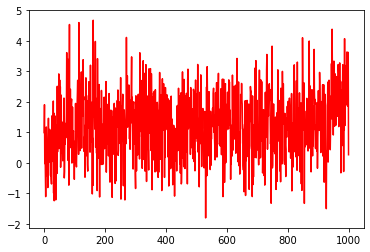

In [ ]:
data = np.load('results_aufgabe_1.npz')
Result = data['Result']

plt.plot(range(1000),Result, color='red')
plt.show()